<a href="https://colab.research.google.com/github/MediciHouse07/ABM_Analysis/blob/main/Test_Simulated_Business_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Define the Business Processes:

In [ ]:
import random

def process_a(input_data):
  """Simulates business process A."""
  # Modify input_data based on the process rules
  # Example: Adding a random value between 0 and 10.
  output = input_data + random.uniform(0, 10)
  return output

def process_b(input_data):
  """Simulates business process B."""
  # Modify input_data based on the process rules
  # Example: Multiply input_data by a random value between 0 and 2.
  output = input_data * random.uniform(0, 2)
  return output

2. Generate Input Data:

In [ ]:
import numpy as np

# Example: Generate 100 random data points between 0 and 100.
input_data = np.random.rand(100) * 100

In [ ]:
results_a = [process_a(data) for data in input_data]
results_b = [process_b(data) for data in input_data]

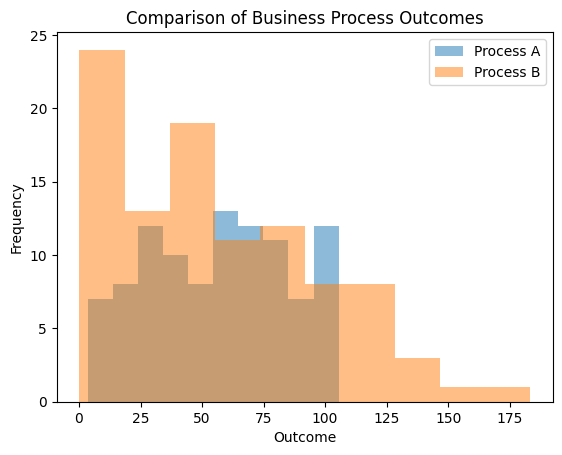

In [ ]:
import matplotlib.pyplot as plt

plt.hist(results_a, alpha=0.5, label='Process A')
plt.hist(results_b, alpha=0.5, label='Process B')
plt.legend(loc='upper right')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Comparison of Business Process Outcomes')

plt.show()

In [ ]:
# !pip install matplotlib

In [ ]:
import random

def vcg_bilateral_trade(buyer_valuation, seller_valuation):
  """Simulates bilateral trade with the VCG mechanism.

  Args:
    buyer_valuation: The buyer's valuation for the item.
    seller_valuation: The seller's valuation for the item.

  Returns:
    A tuple containing:
      - True if trade occurs, False otherwise.
      - The price paid by the buyer (if trade occurs).
      - The buyer's utility.
      - The seller's utility.
  """

  # Determine if trade occurs
  if buyer_valuation > seller_valuation:
    trade_occurs = True
  else:
    trade_occurs = False

  # Calculate price and utilities if trade occurs
  if trade_occurs:
    # VCG price: the externality imposed on the other party
    price = seller_valuation

    # Buyer's utility: valuation minus price
    buyer_utility = buyer_valuation - price

    # Seller's utility: price minus valuation
    seller_utility = price - seller_valuation
  else:
    price = 0
    buyer_utility = 0
    seller_utility = 0

  return trade_occurs, price, buyer_utility, seller_utility

# Example usage
buyer_valuation = random.randint(1, 10)
seller_valuation = random.randint(1, 10)

trade_occurs, price, buyer_utility, seller_utility = vcg_bilateral_trade(buyer_valuation, seller_valuation)

print(f"Buyer valuation: {buyer_valuation}")
print(f"Seller valuation: {seller_valuation}")
print(f"Trade occurs: {trade_occurs}")
if trade_occurs:
  print(f"Price: {price}")
  print(f"Buyer utility: {buyer_utility}")
  print(f"Seller utility: {seller_utility}")

Buyer valuation: 10
Seller valuation: 5
Trade occurs: True
Price: 5
Buyer utility: 5
Seller utility: 0


In [ ]:
import random

def vcg_bilateral_trade(buyer_valuation, seller_valuation):
  """Simulates bilateral trade with the VCG mechanism.

  Args:
    buyer_valuation: The buyer's valuation for the item.
    seller_valuation: The seller's valuation for the item.

  Returns:
    A tuple containing:
      - True if trade occurs, False otherwise.
      - The price paid by the buyer (if trade occurs).
      - The buyer's utility.
      - The seller's utility.
  """

  # Determine if trade occurs
  if buyer_valuation > seller_valuation:
    trade_occurs = True
  else:
    trade_occurs = False

  # Calculate price and utilities if trade occurs
  if trade_occurs:
    # VCG price: the externality imposed on the other party
    price = seller_valuation

    # Buyer's utility: valuation minus price
    buyer_utility = buyer_valuation - price

    # Seller's utility: price minus valuation
    seller_utility = price - seller_valuation
  else:
    price = 0
    buyer_utility = 0
    seller_utility = 0

  return trade_occurs, price, buyer_utility, seller_utility

# Example usage
buyer_valuation = random.randint(1, 10)
seller_valuation = random.randint(1, 10)

trade_occurs, price, buyer_utility, seller_utility = vcg_bilateral_trade(buyer_valuation, seller_valuation)

print(f"Buyer valuation: {buyer_valuation}")
print(f"Seller valuation: {seller_valuation}")
print(f"Trade occurs: {trade_occurs}")
if trade_occurs:
  print(f"Price: {price}")
  print(f"Buyer utility: {buyer_utility}")
  print(f"Seller utility: {seller_utility}")

Buyer valuation: 5
Seller valuation: 9
Trade occurs: False


In [ ]:
import random

def vcg_bilateral_trade(buyer_valuation, seller_valuation, d=1):
  """Simulates bilateral trade with the VCG mechanism.

  Args:
    buyer_valuation: The buyer's valuation for the item (theta_b).
    seller_valuation: The seller's inherent cost (theta_s).
    d: A scaling factor for the externality.

  Returns:
    A tuple containing:
      - True if trade occurs, False otherwise.
      - The price paid by the buyer (if trade occurs).
      - The buyer's utility.
      - The seller's utility.
  """

  # Seller's valuation with externality
  seller_true_valuation = -d * seller_valuation

  # Determine if trade occurs
  if buyer_valuation > -seller_true_valuation:  # Trade if buyer's valuation is higher than seller's cost
    trade_occurs = True
  else:
    trade_occurs = False

  # Calculate price and utilities if trade occurs
  if trade_occurs:
    # VCG price: externality imposed on the buyer
    price = -seller_true_valuation  # Price paid by the buyer

    # Buyer's utility: valuation minus price
    buyer_utility = buyer_valuation - price

    # Seller's transfer: Externality of the buyer minus the buyer's valuation
    seller_transfer = d * buyer_valuation - buyer_valuation

    # Seller's utility: transfer plus inherent valuation
    seller_utility = seller_transfer + seller_true_valuation
  else:
    price = 0
    buyer_utility = 0
    seller_utility = seller_true_valuation # Seller keeps the item, so their utility is their valuation

  return trade_occurs, price, buyer_utility, seller_utility

# Example usage
buyer_valuation = 8 # random.randint(1, 10)
seller_valuation = 8 # random.randint(1, 10)

trade_occurs, price, buyer_utility, seller_utility = vcg_bilateral_trade(buyer_valuation, seller_valuation)

print(f"Buyer valuation: {buyer_valuation}")
print(f"Seller valuation (inherent cost): {seller_valuation}")
print(f"Trade occurs: {trade_occurs}")
if trade_occurs:
  print(f"Price: {price}")
  print(f"Buyer utility: {buyer_utility}")
  print(f"Seller utility: {seller_utility}")
else:
  print(f"Price: {price}")
  print(f"Buyer utility: {buyer_utility}")
  print(f"Seller utility: {seller_utility}")
  print(f"Seller utility (keeps the item): {seller_utility}")

Buyer valuation: 8
Seller valuation (inherent cost): 8
Trade occurs: False
Price: 0
Buyer utility: 0
Seller utility: -8
Seller utility (keeps the item): -8


In [ ]:
import random

def vcg_bilateral_trade(buyer_valuation, seller_valuation, d=1):
  """Simulates bilateral trade with the VCG mechanism.

  Args:
    buyer_valuation: The buyer's valuation for the item (theta_b).
    seller_valuation: The seller's inherent cost (theta_s).
    d: A scaling factor for the externality.

  Returns:
    A tuple containing:
      - True if trade occurs, False otherwise.
      - The price paid by the buyer (if trade occurs).
      - The buyer's utility.
      - The seller's utility.
  """

  # Seller's valuation with externality
  seller_true_valuation = -d * seller_valuation

  # Determine if trade occurs
  if buyer_valuation >= -seller_true_valuation:  # Trade if buyer's valuation is higher than seller's cost
    trade_occurs = True
  else:
    trade_occurs = False

  # Calculate price and utilities if trade occurs
  if trade_occurs:
    # VCG price: externality imposed on the buyer
    price = -seller_true_valuation  # Price paid by the buyer

    # Buyer's utility: valuation minus price
    buyer_utility = buyer_valuation - price

    # Seller's transfer: Externality of the buyer minus the buyer's valuation
    seller_transfer = d * buyer_valuation - buyer_valuation

    # Seller's utility: transfer plus inherent valuation
    seller_utility = seller_transfer + seller_true_valuation
  else:
    price = 0
    buyer_utility = 0
    seller_utility = seller_true_valuation # Seller keeps the item, so their utility is their valuation

  return trade_occurs, price, buyer_utility, seller_utility

# Example usage
buyer_valuation = 8 # random.randint(1, 10)
seller_valuation = 8 # random.randint(1, 10)

trade_occurs, price, buyer_utility, seller_utility = vcg_bilateral_trade(buyer_valuation, seller_valuation)

print(f"Buyer valuation: {buyer_valuation}")
print(f"Seller valuation (inherent cost): {seller_valuation}")
print(f"Trade occurs: {trade_occurs}")
if trade_occurs:
  print(f"Price: {price}")
  print(f"Buyer utility: {buyer_utility}")
  print(f"Seller utility: {seller_utility}")
else:
  print(f"Price: {price}")
  print(f"Buyer utility: {buyer_utility}")
  print(f"Seller utility: {seller_utility}")
  print(f"Seller utility (keeps the item): {seller_utility}")

Buyer valuation: 8
Seller valuation (inherent cost): 8
Trade occurs: True
Price: 8
Buyer utility: 0
Seller utility: -8


In [ ]:
import random

def vcg_bilateral_trade(buyer_private_valuation, seller_private_valuation,
                        buyer_declared_valuation, seller_declared_valuation, d=1):
    """Simulates bilateral trade with the VCG mechanism.

    Args:
        buyer_private_valuation: The buyer's true valuation.
        seller_private_valuation: The seller's true cost.
        buyer_declared_valuation: The valuation the buyer declares.
        seller_declared_valuation: The cost the seller declares.
        d: Externality scaling factor.

    Returns:
        Tuple: (trade_occurs, price, buyer_utility, seller_utility)
    """

    # Seller's declared valuation with externality
    seller_declared_true_valuation = -d * seller_declared_valuation

    # Trade decision based on declared valuations
    if buyer_declared_valuation >= -seller_declared_true_valuation:
        trade_occurs = True
    else:
        trade_occurs = False

    if trade_occurs:
        # VCG price based on declared valuations
        price = -seller_declared_true_valuation

        # Buyer's utility (using private valuation)
        buyer_utility = buyer_private_valuation - price

        # Seller's transfer (using declared valuations)
        seller_transfer = d * buyer_declared_valuation - buyer_declared_valuation

        # Seller's utility (using private valuation)
        seller_utility = seller_transfer + (-d * seller_private_valuation)
    else:
        price = 0
        buyer_utility = 0
        seller_utility = -d * seller_private_valuation

    return trade_occurs, price, buyer_utility, seller_utility

# Example usage with declared and private valuations
buyer_private_valuation = 8
seller_private_valuation = 5
buyer_declared_valuation = 8  # Buyer declares truthfully
seller_declared_valuation = 6 # Seller declares higher cost

trade_occurs, price, buyer_utility, seller_utility = vcg_bilateral_trade(
    buyer_private_valuation, seller_private_valuation,
    buyer_declared_valuation, seller_declared_valuation
)

print(f"Buyer private valuation: {buyer_private_valuation}")
print(f"Seller private valuation (inherent cost): {seller_private_valuation}")
print(f"Buyer declared valuation: {buyer_declared_valuation}")
print(f"Seller declared valuation (inherent cost): {seller_declared_valuation}")
print(f"Trade occurs: {trade_occurs}")
if trade_occurs:
  print(f"Price: {price}")
  print(f"Buyer utility: {buyer_utility}")
  print(f"Seller utility: {seller_utility}")
else:
  print(f"Price: {price}")
  print(f"Buyer utility: {buyer_utility}")
  print(f"Seller utility: {seller_utility}")
  print(f"Seller utility (keeps the item): {seller_utility}")

Buyer private valuation: 8
Seller private valuation (inherent cost): 5
Buyer declared valuation: 8
Seller declared valuation (inherent cost): 6
Trade occurs: True
Price: 6
Buyer utility: 2
Seller utility: -5
